In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fixed Battery Voltage         5000 non-null   float64
 1   Portable Battery Voltage      5000 non-null   float64
 2   Portable Battery Current      5000 non-null   float64
 3   Fixed Battery Current         5000 non-null   float64
 4   Motor Status                  5000 non-null   int64  
 5   BCM Battery Selected          5000 non-null   int64  
 6   Portable Battery Temperature  5000 non-null   float64
 7   Fixed Battery Temperature     5000 non-null   float64
 8   Effective SOC                 5000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 351.7 KB
None
   Fixed Battery Voltage  Portable Battery Voltage  Portable Battery Current  \
0              11.872701                 11.968178                 -1.263592   
1              14.753572    

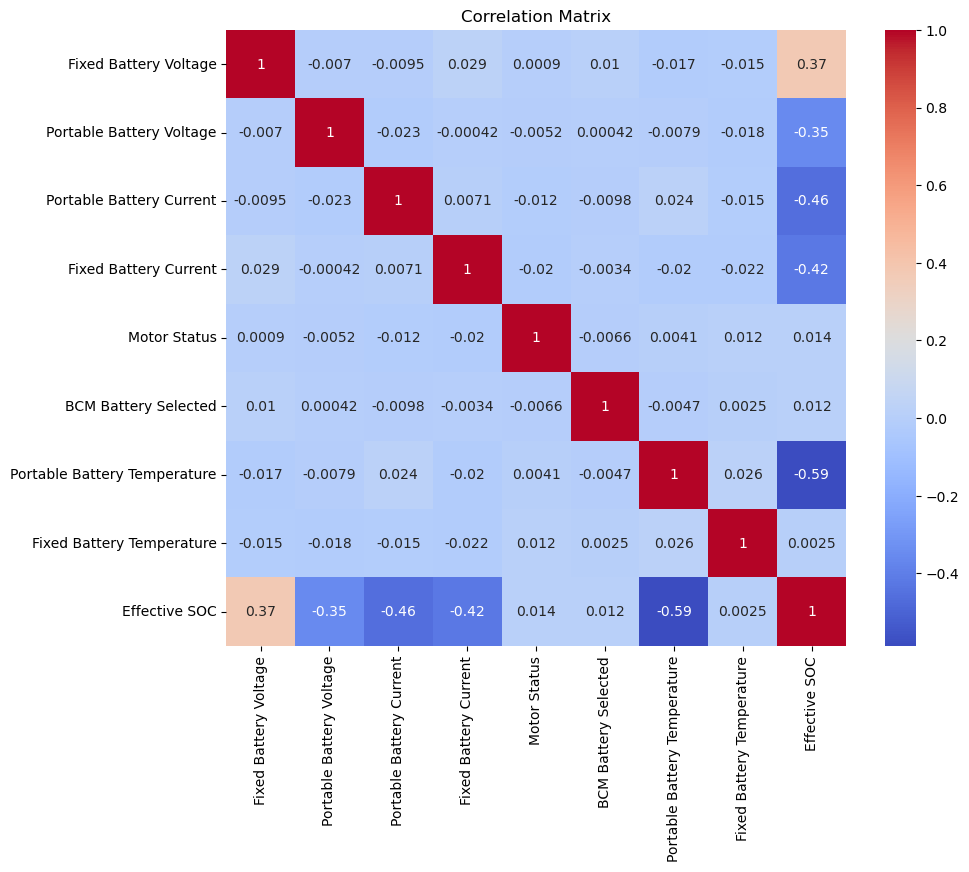

In [11]:
# Step 1: Load the dataset
df = pd.read_csv("C:\\Users\\vihar\\Downloads\\synthetic_battery_data.csv")

# Step 2: Exploratory Data Analysis (EDA)
# Check the structure of the dataset
print(df.info())

# Check the first few rows
print(df.head())

# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Distributions:


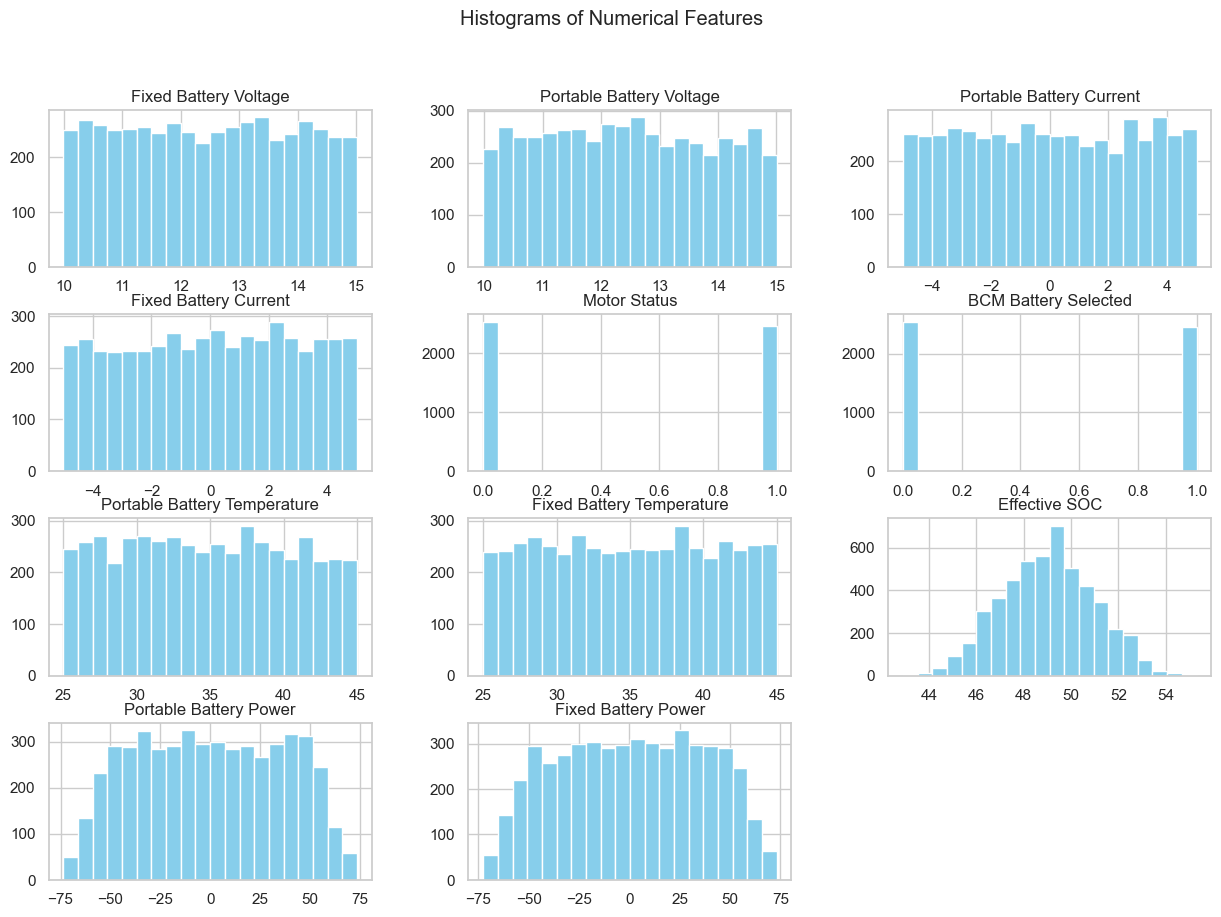

Pair Plot of Features vs. Target Variable:


C:\Users\vihar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


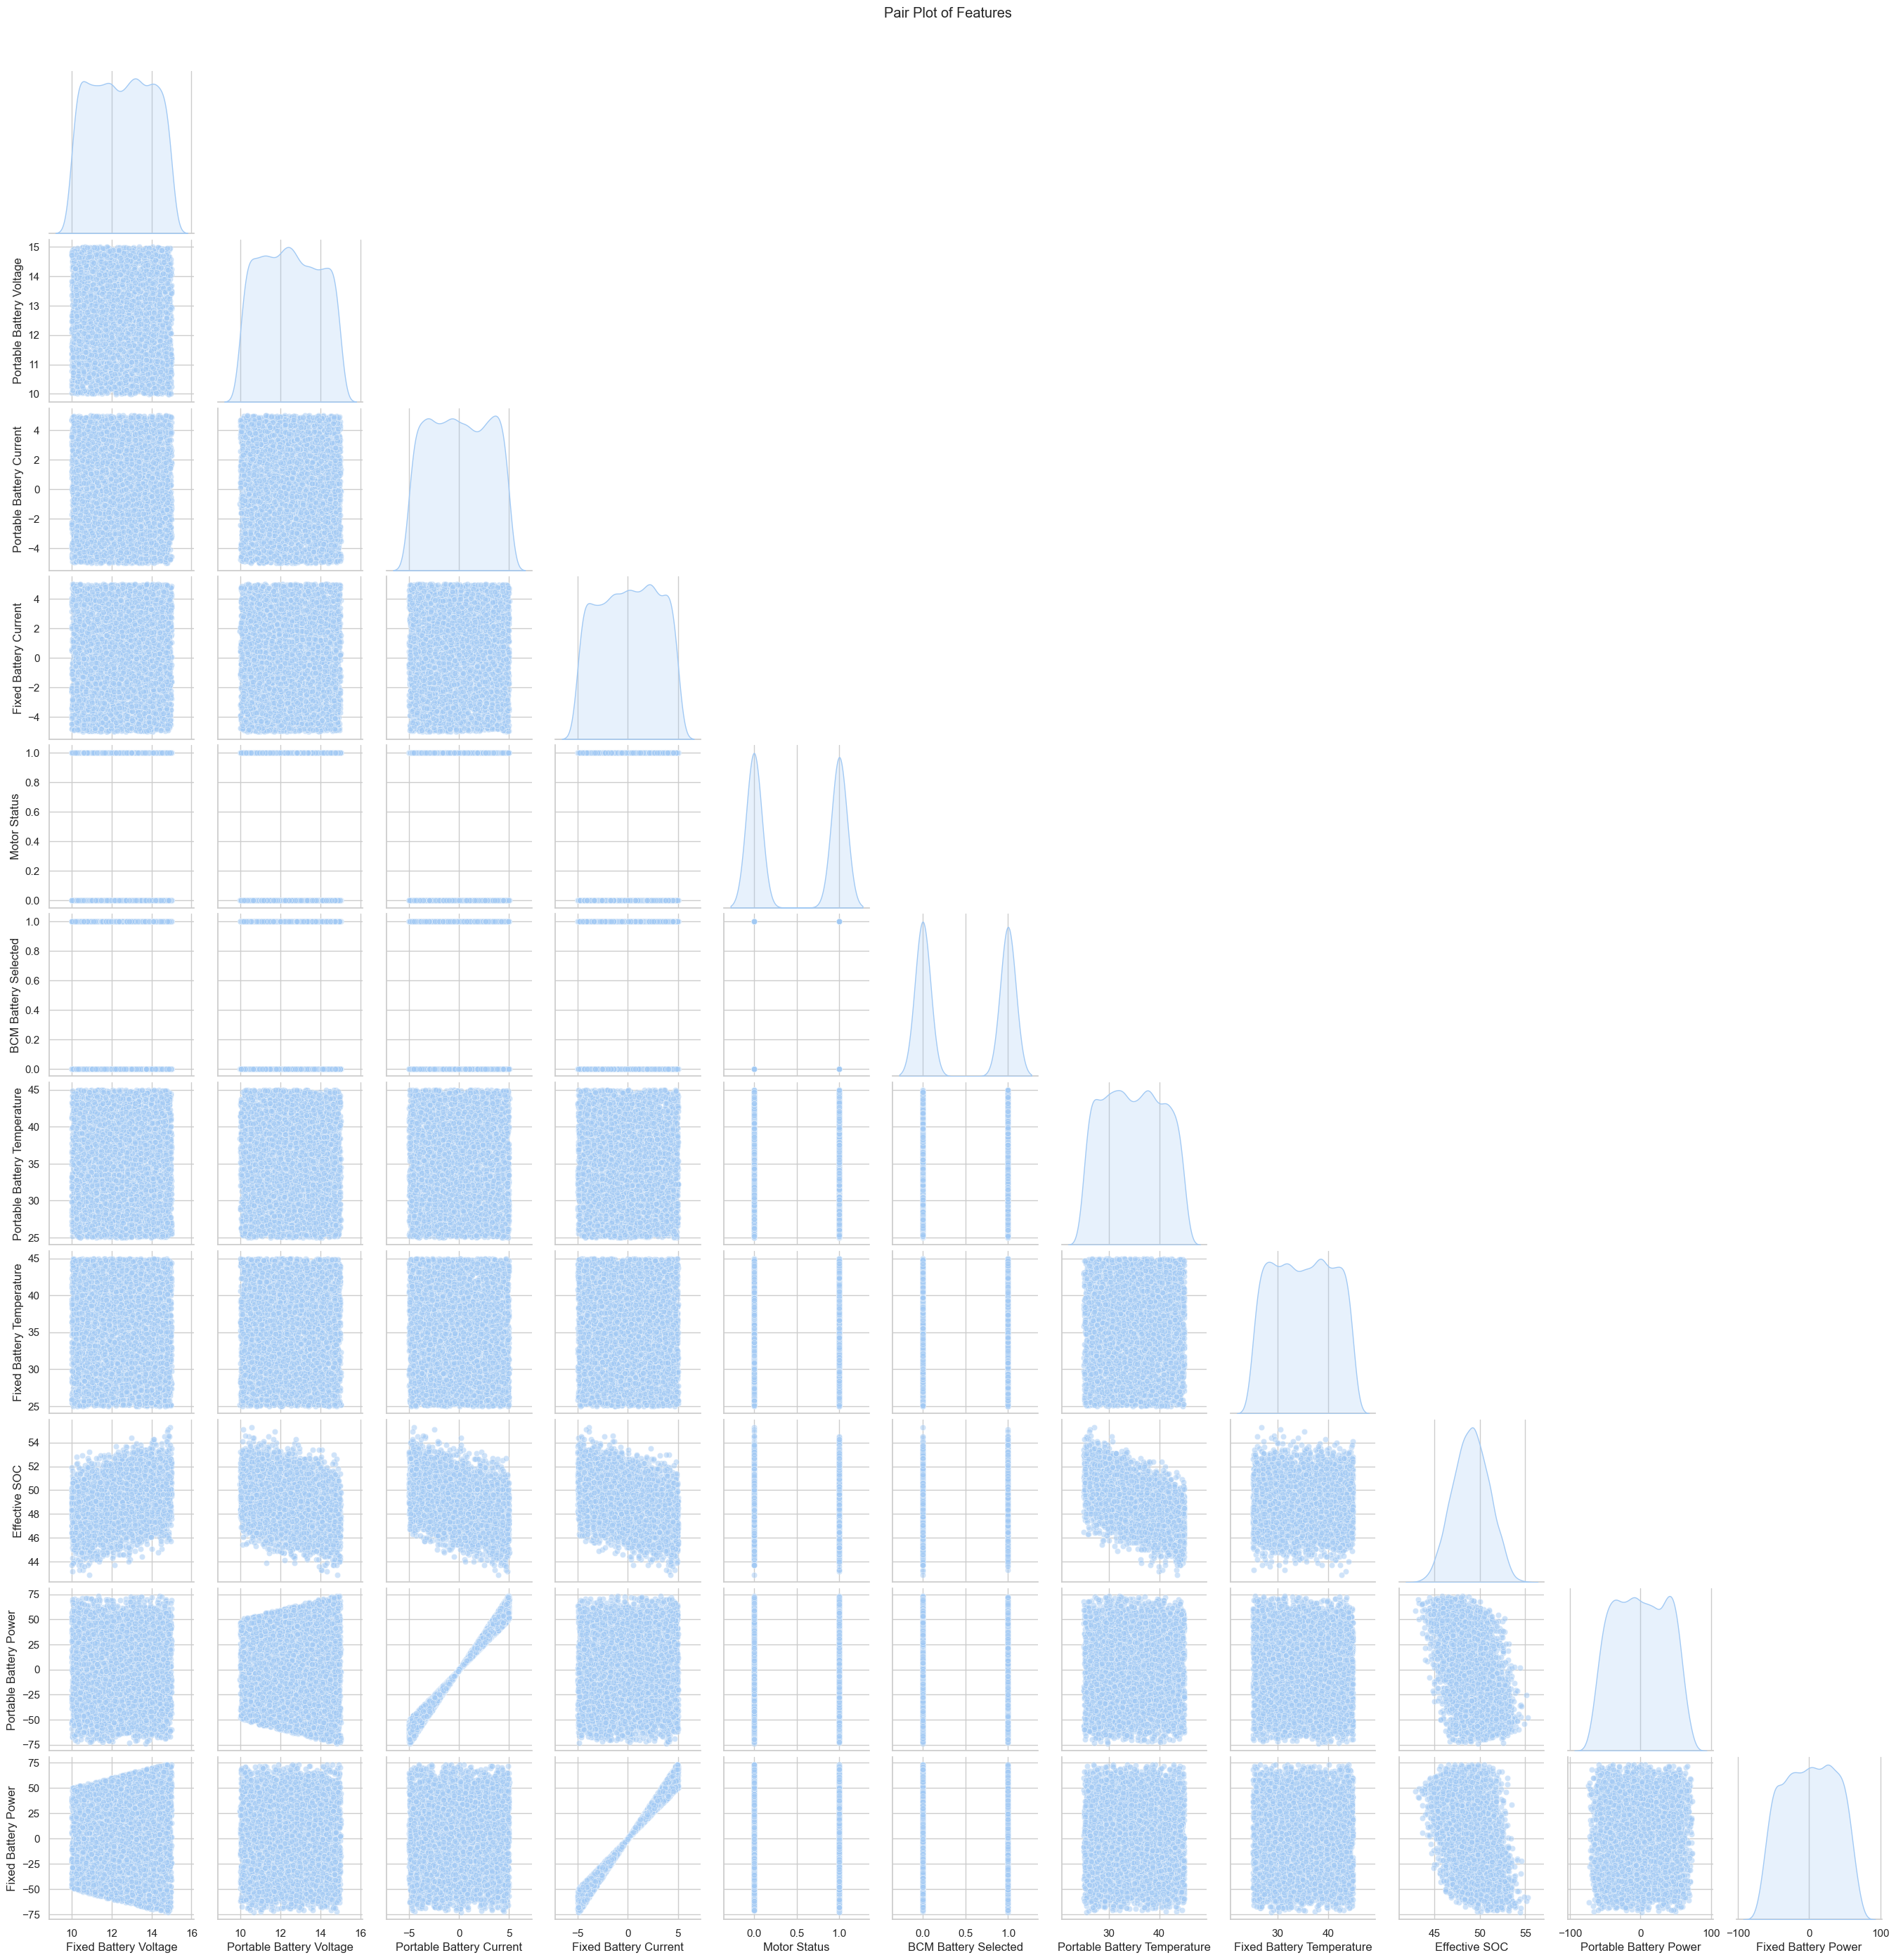

Heatmap of Feature Correlations:


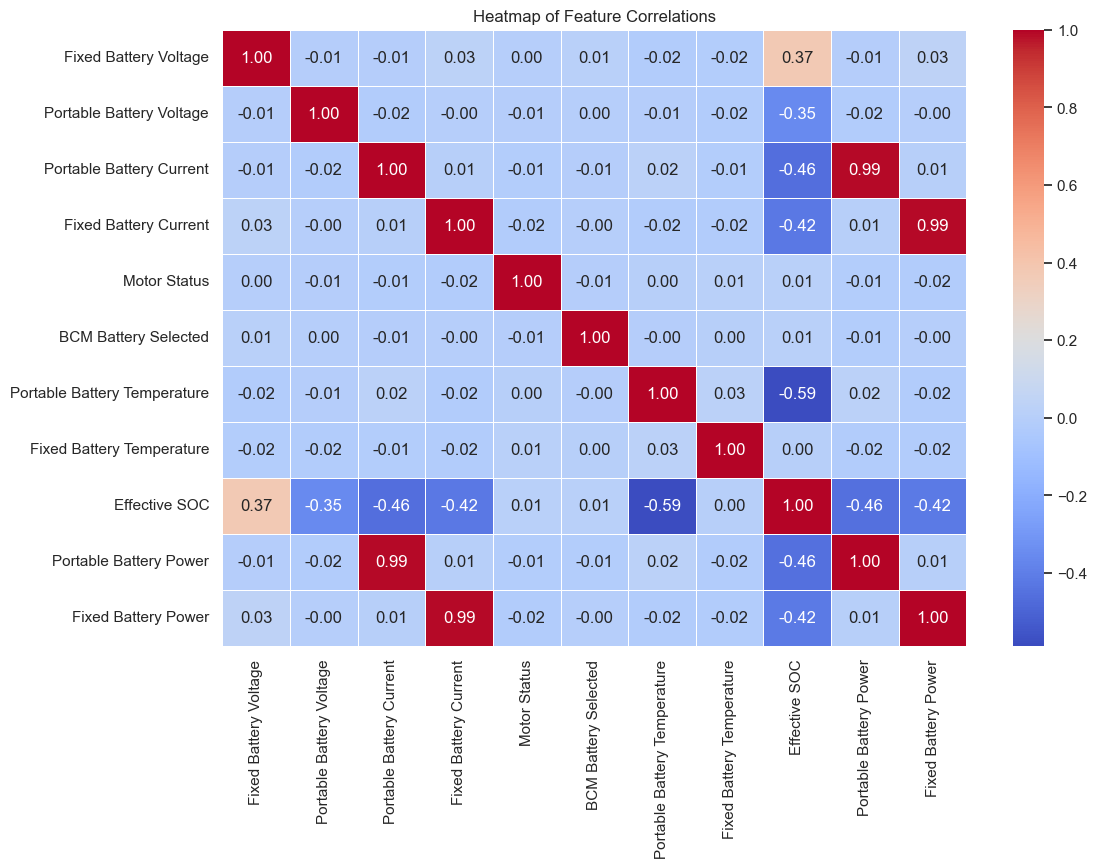

In [19]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style='whitegrid', palette='pastel')

# Step 1: Histogram for each numerical column
# --------------------------------------------------
print("Feature Distributions:")
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.show()



# Step 3: Pair Plot for Relationships between Features and Target
# --------------------------------------------------
print("Pair Plot of Features vs. Target Variable:")
sns.pairplot(df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.5}, height=2.5)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# Step 4: Heatmap for Feature Correlations
# --------------------------------------------------
print("Heatmap of Feature Correlations:")
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [12]:
# Define features (X) and target (y)
X = df.drop('Effective SOC', axis=1)
y = df['Effective SOC']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize and Train Different Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regressor': SVR(kernel='rbf')
}

# Dictionary to store R-squared scores of each model
model_scores = {}

In [13]:
# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    model_scores[model_name] = r2
    print(f"{model_name} R-squared: {r2:.4f}")

Linear Regression R-squared: 0.9998
Decision Tree R-squared: 0.8865
Random Forest R-squared: 0.9713
Gradient Boosting R-squared: 0.9887
K-Nearest Neighbors R-squared: 0.9403
Support Vector Regressor R-squared: 0.9981


In [15]:
if best_r2_score >= 0.94:
    print("Achieved target accuracy above 94%!")
else:
    print("Target accuracy not achieved. Consider further tuning.")

Achieved target accuracy above 94%!


Linear Regression R-squared: 0.9998 | MSE: 0.0009
Decision Tree R-squared: 0.8816 | MSE: 0.4660
Random Forest R-squared: 0.9719 | MSE: 0.1106
Gradient Boosting R-squared: 0.9886 | MSE: 0.0447
Support Vector Regressor R-squared: 0.9856 | MSE: 0.0566
K-Nearest Neighbors R-squared: 0.7669 | MSE: 0.9174


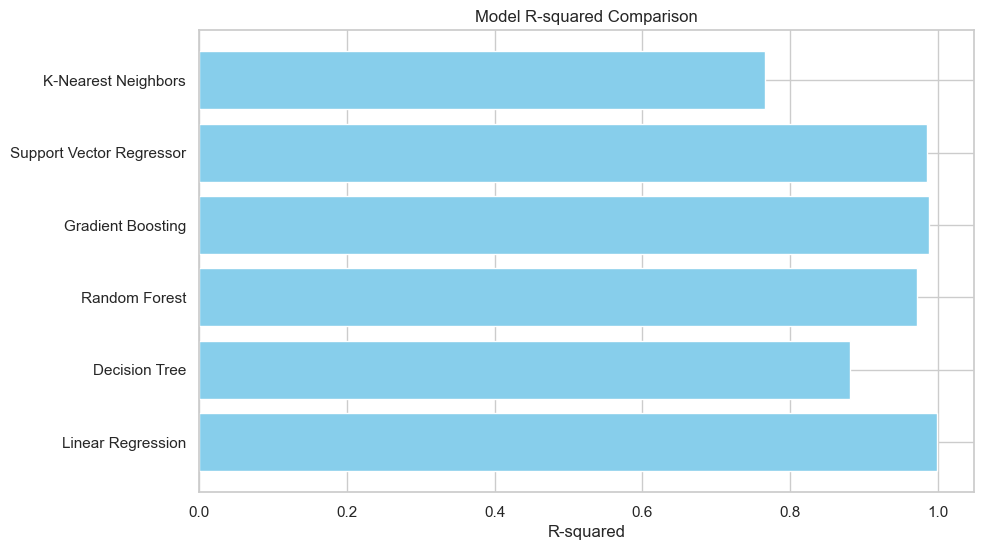

In [23]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the regression models to be used
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train each model and evaluate performance
results = {}
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = r2
    print(f"{model_name} R-squared: {r2:.4f} | MSE: {mse:.4f}")

# Plotting R-squared values of all models
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('R-squared')
plt.title('Model R-squared Comparison')
plt.show()


Linear Regression - R-squared: 0.9998, MSE: 0.0009, MAE: 0.0251


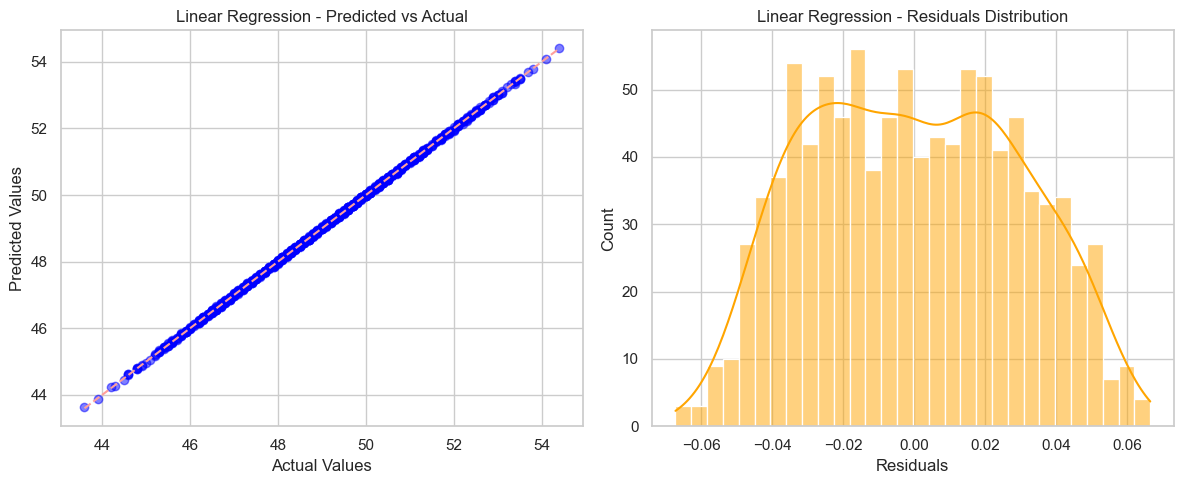

Decision Tree - R-squared: 0.8848, MSE: 0.4534, MAE: 0.5328


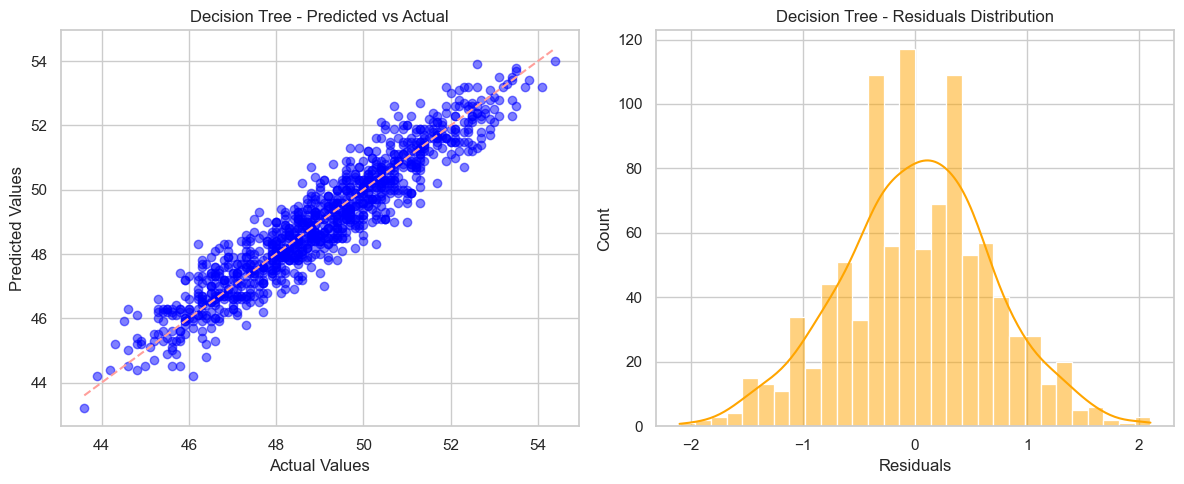

Random Forest - R-squared: 0.9717, MSE: 0.1112, MAE: 0.2622


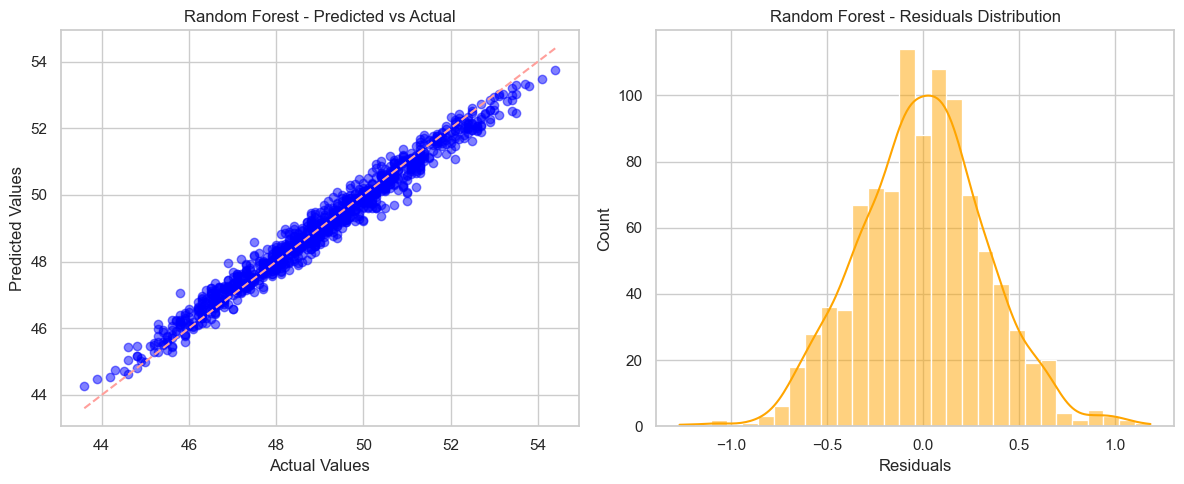

Gradient Boosting - R-squared: 0.9886, MSE: 0.0447, MAE: 0.1697


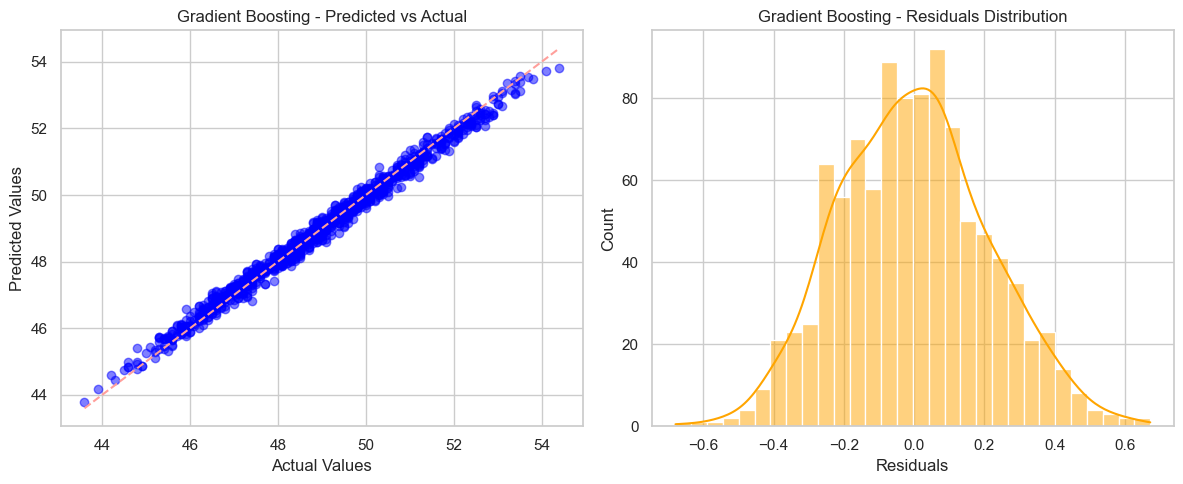

Support Vector Regressor - R-squared: 0.9856, MSE: 0.0566, MAE: 0.1715


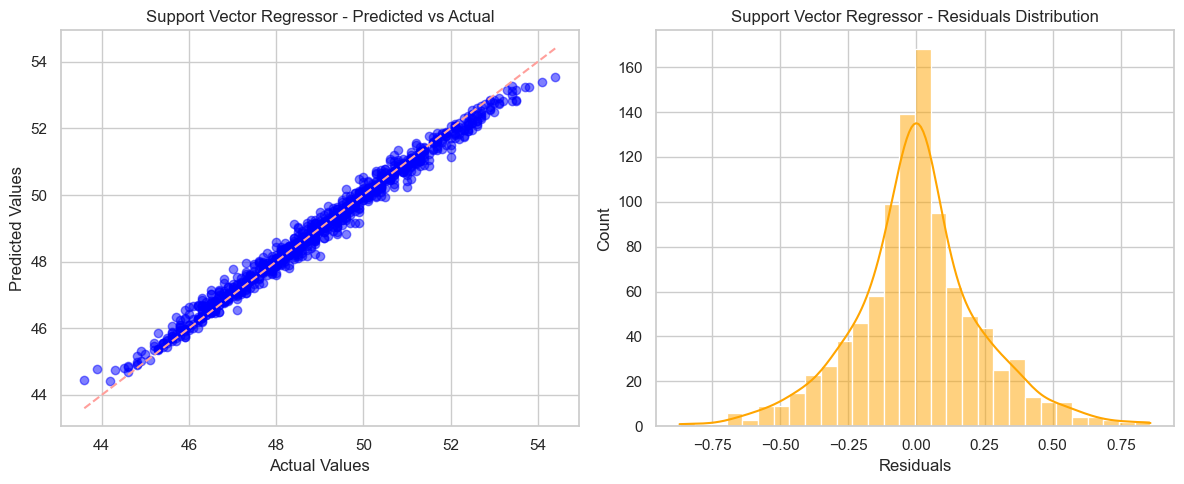

K-Nearest Neighbors - R-squared: 0.7669, MSE: 0.9174, MAE: 0.7773


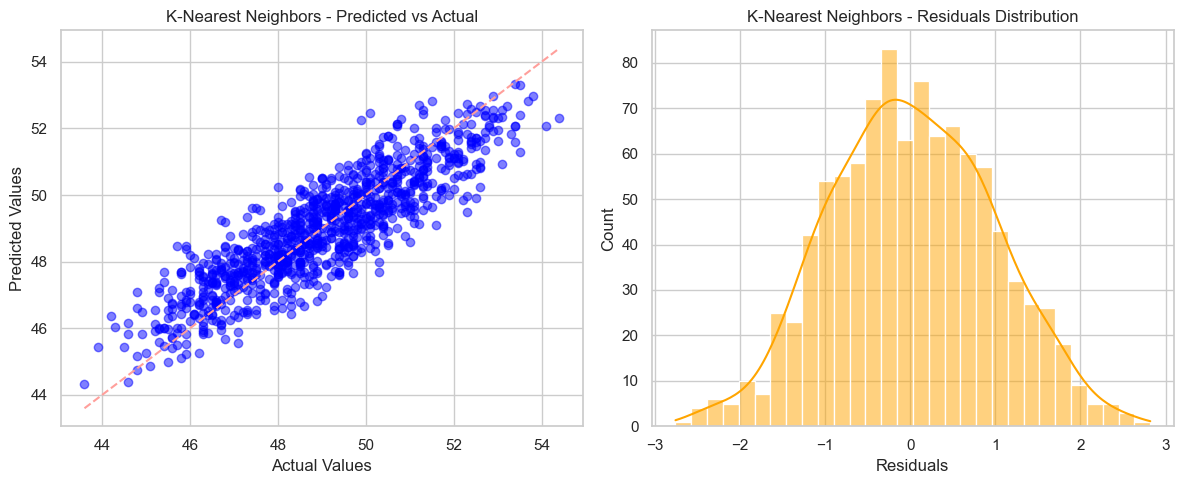

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Define the regression models to be used
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train each model, evaluate performance, and plot results
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name} - R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")
    
    # Plot Predicted vs Actual
    plt.figure(figsize=(12, 5))
    
    # Subplot for Predicted vs Actual
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line of equality
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    # Subplot for Residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, color='orange', bins=30)
    plt.title(f'{model_name} - Residuals Distribution')
    plt.xlabel('Residuals')
    
    plt.tight_layout()
    plt.show()
